<a href="https://colab.research.google.com/github/anunair222/GRIP_DATAANALYSIS/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TSF - GRIPOCT21**

# **Author:** ***ANU NAIR S***

# **TASK 4: Exploratory Data Analysis - Terrorism**

## ***AIM: To perform exploratory data analysis on Global Terrorism Dataset***

## **Importing libraries and the dataset**

In [22]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#FILE UPLOAD

from google.colab import files
uploaded = files.upload()

Saving globalterrorismdb_0718dist.csv to globalterrorismdb_0718dist.csv


In [114]:
#importing the data file
df=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1',header=0)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## **Data Preparation & Cleaning**

In [115]:
#column headers
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [116]:
#renaming the columns for easy access
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','natlty1_txt':'nationality_of_target','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [117]:
#retaining only the essential columns for analysis
df = df[['Year','Month','day','nationality_of_target','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive','success']]
df.head()

,Year,Month,day,nationality_of_target,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive,success
0,1970,7,2,Dominican Republic,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Belgium,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,1970,1,0,United States,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,United States,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,1970,1,0,United States,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


In [118]:
#checking for null values
df.isnull().sum()

Year                          0
Month                         0
day                           0
nationality_of_target      1559
Country                       0
State                       421
Region                        0
City                        434
latitude                   4556
longitude                  4557
Attacktype                    0
kill                      10313
Wound                     16311
target1                     636
summary                   66129
Group                         0
Targettype                    0
Weapon                        0
motive                   131130
success                       0
dtype: int64

### **Data Imputation**

In [119]:
#replacing null value with 'unknown'  
df['State'].fillna("unknown", inplace = True)
df['City'].fillna("unknown", inplace = True)
df['target1'].fillna("unknown", inplace = True)

In [120]:
#replacing null with '0'
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)

In [121]:
#combine kill and wound column to one column named casuality
df['Casualities']=df['kill']+df['Wound']

In [122]:
#deleting kill and wound columns
del df['kill']
del df['Wound']
df.head()

,Year,Month,day,nationality_of_target,Country,State,Region,City,latitude,longitude,Attacktype,target1,summary,Group,Targettype,Weapon,motive,success,Casualities
0,1970,7,2,Dominican Republic,Dominican Republic,unknown,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1,1.0
1,1970,0,0,Belgium,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1,0.0
2,1970,1,0,United States,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1,1.0
3,1970,1,0,United States,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1,0.0
4,1970,1,0,United States,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1,0.0


In [123]:
# drop all other columns with null values
df.dropna(axis=1, inplace=True)  
df

,Year,Month,day,Country,State,Region,City,Attacktype,target1,Group,Targettype,Weapon,success,Casualities
0,1970,7,2,Dominican Republic,unknown,Central America & Caribbean,Santo Domingo,Assassination,Julio Guzman,MANO-D,Private Citizens & Property,Unknown,1,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown,1,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,Assassination,Employee,Unknown,Journalists & Media,Unknown,1,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,Bombing/Explosion,U.S. Embassy,Unknown,Government (Diplomatic),Explosives,1,0.0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Facility/Infrastructure Attack,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,Armed Assault,Checkpoint,Al-Shabaab,Military,Firearms,1,3.0
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,Bombing/Explosion,Hmeymim Air Base,Muslim extremists,Military,Explosives,1,9.0
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,Facility/Infrastructure Attack,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,1,0.0
181689,2017,12,31,India,Manipur,South Asia,Imphal,Bombing/Explosion,Office,Unknown,Government (General),Explosives,0,0.0


In [124]:
#shape of the data
df.shape

(181691, 14)

In [125]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181691 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181691 non-null  object 
 7   Attacktype   181691 non-null  object 
 8   target1      181691 non-null  object 
 9   Group        181691 non-null  object 
 10  Targettype   181691 non-null  object 
 11  Weapon       181691 non-null  object 
 12  success      181691 non-null  int64  
 13  Casualities  181691 non-null  float64
dtypes: float64(1), int64(4), object(9)
memory usage: 19.4+ MB


In [126]:
#statistics of the data
df.describe()

,Year,Month,day,success,Casualities
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.889598,5.150156
std,13.259430,3.388303,8.814045,0.313391,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,1.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,1.000000
75%,2014.000000,9.000000,23.000000,1.000000,4.000000
max,2017.000000,12.000000,31.000000,1.000000,9574.000000


## **Data Visualization**

Text(0.5, 1.0, 'Attacks per Year')

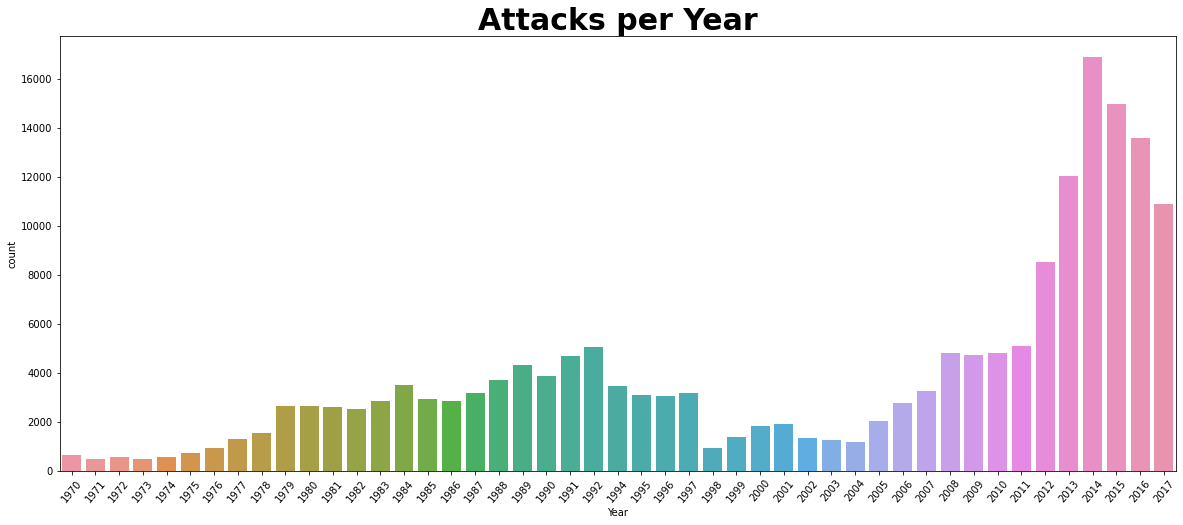

In [127]:
#Number of attacks every year
plt.figure(figsize=(20,8))
sns.countplot(x='Year',data=df)
plt.xticks(rotation = 50)
plt.title("Attacks per Year", size=30, fontweight="bold")

Text(0.5, 0, 'Year')

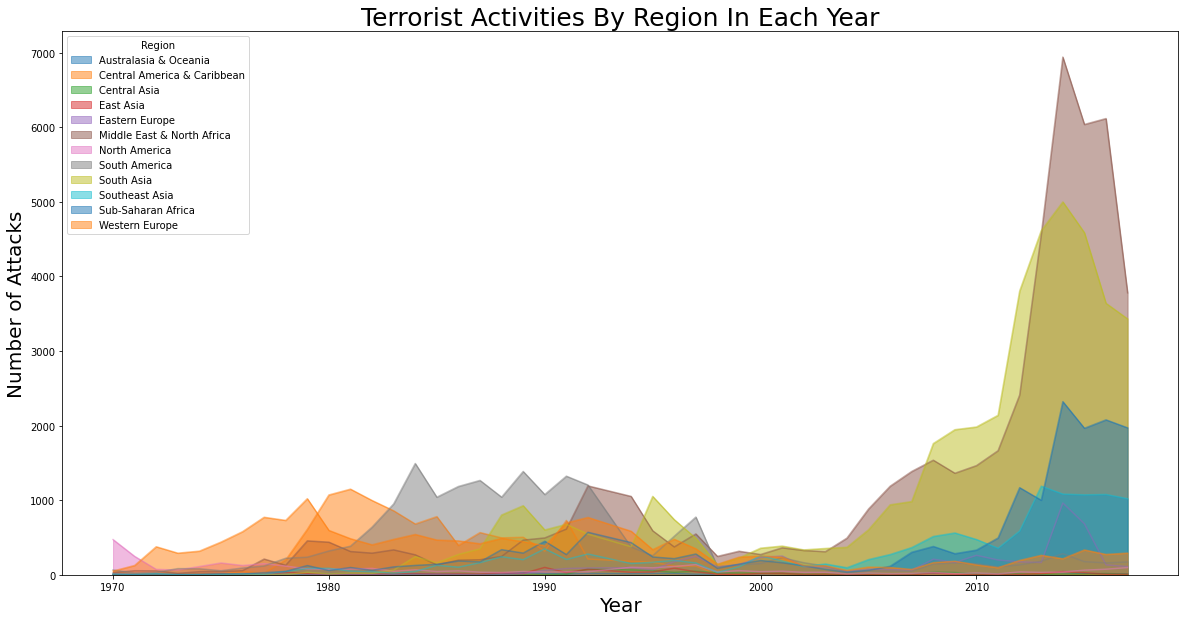

In [128]:
#Number of attacks by region in each year
pd.crosstab(df['Year'], df['Region']).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)

Text(0.5, 1.0, 'Countrywise number of Attacks')

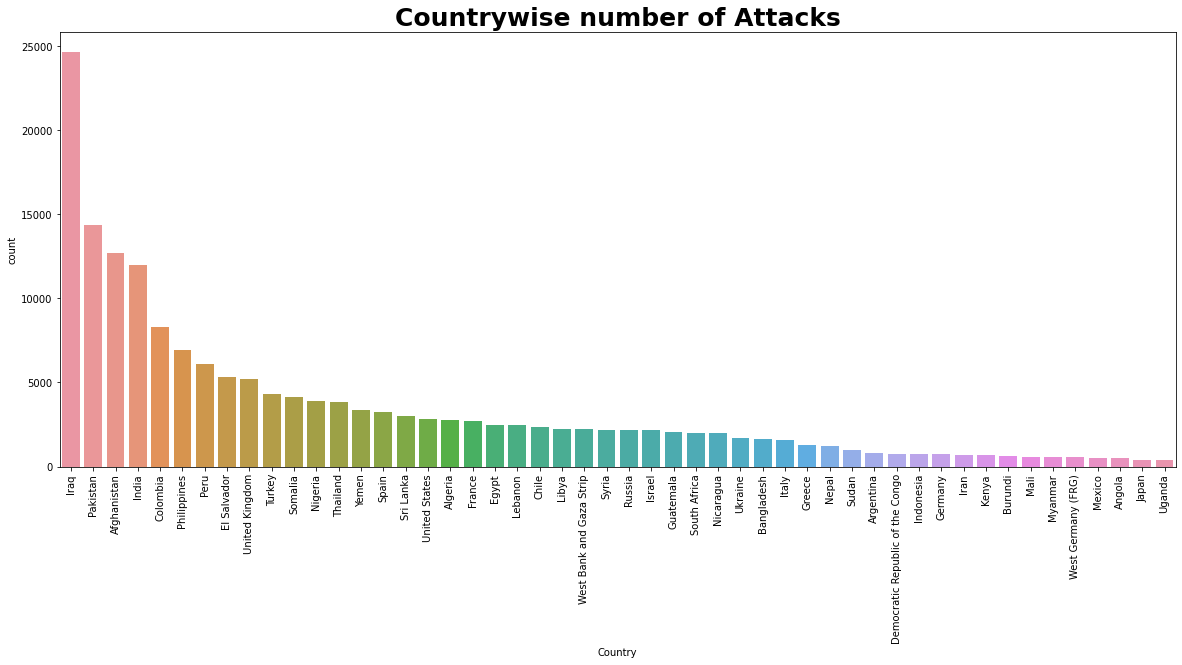

In [129]:
#Total number of attacks in every country
plt.figure(figsize=(20,8))
sns.countplot(x=df['Country'], order=(df['Country'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.title("Countrywise number of Attacks", size=25, fontweight="bold")

Text(0.5, 1.0, 'Yearwise casuality count')

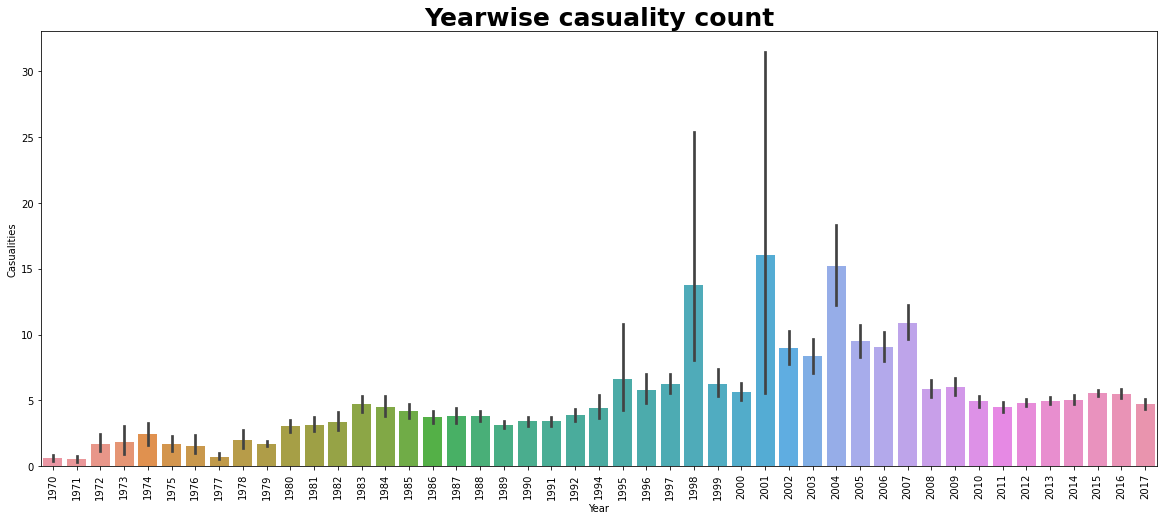

In [130]:
#Casualities of the attacks every year
plt.figure(figsize=(20,8))
sns.barplot(x="Year",y='Casualities', data=df)
plt.xticks(rotation=90)
plt.title("Yearwise casuality count", size=25, fontweight="bold")

Text(0.5, 1.0, 'Citywise Attacks count')

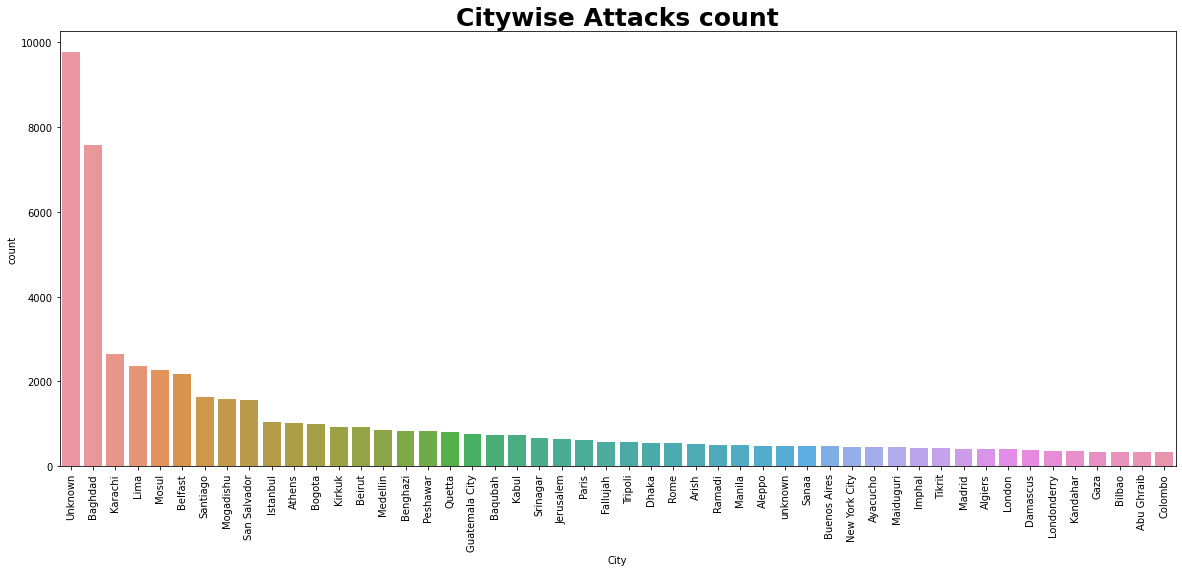

In [131]:
#Total number of attacks in every city
plt.figure(figsize=(20,8))
sns.countplot(x=df['City'], order=(df['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.title("Citywise Attacks count", size=25, fontweight="bold")

Text(0.5, 1.0, 'Frequency of Attacktype')

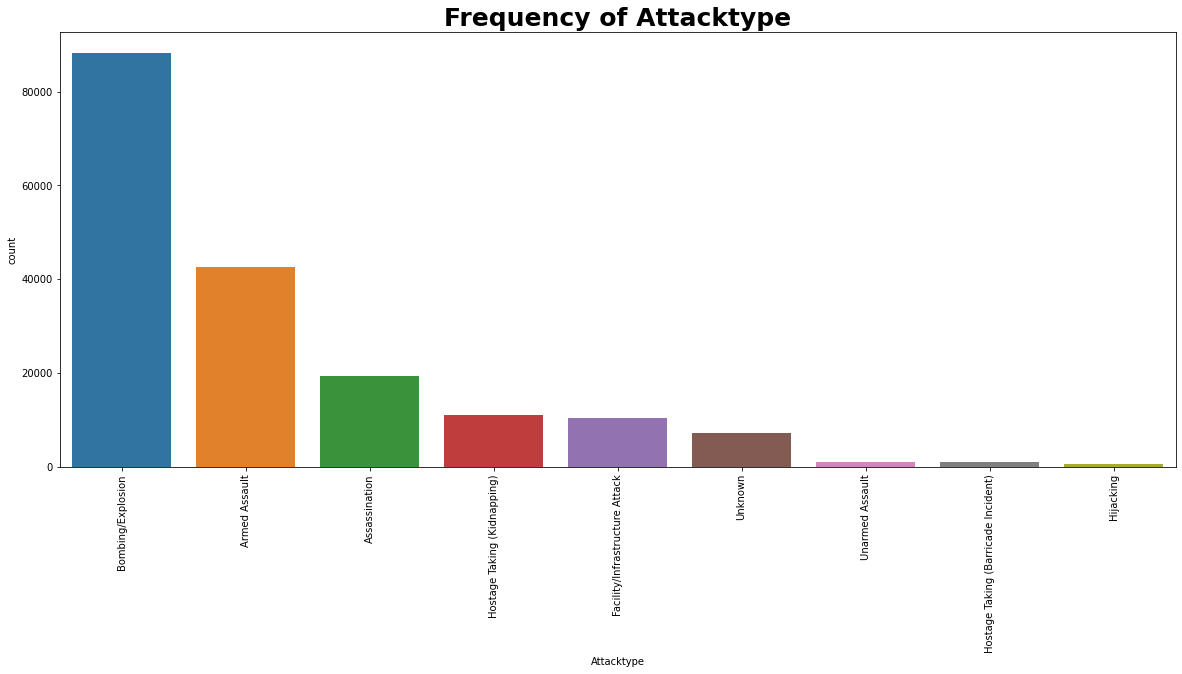

In [132]:
#Frequency of different attack type
plt.figure(figsize=(20,8))
sns.countplot(x=df['Attacktype'], order=(df['Attacktype'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.title("Frequency of Attacktype", size=25, fontweight="bold")

Text(0.5, 1.0, 'Attack typewise casuality count')

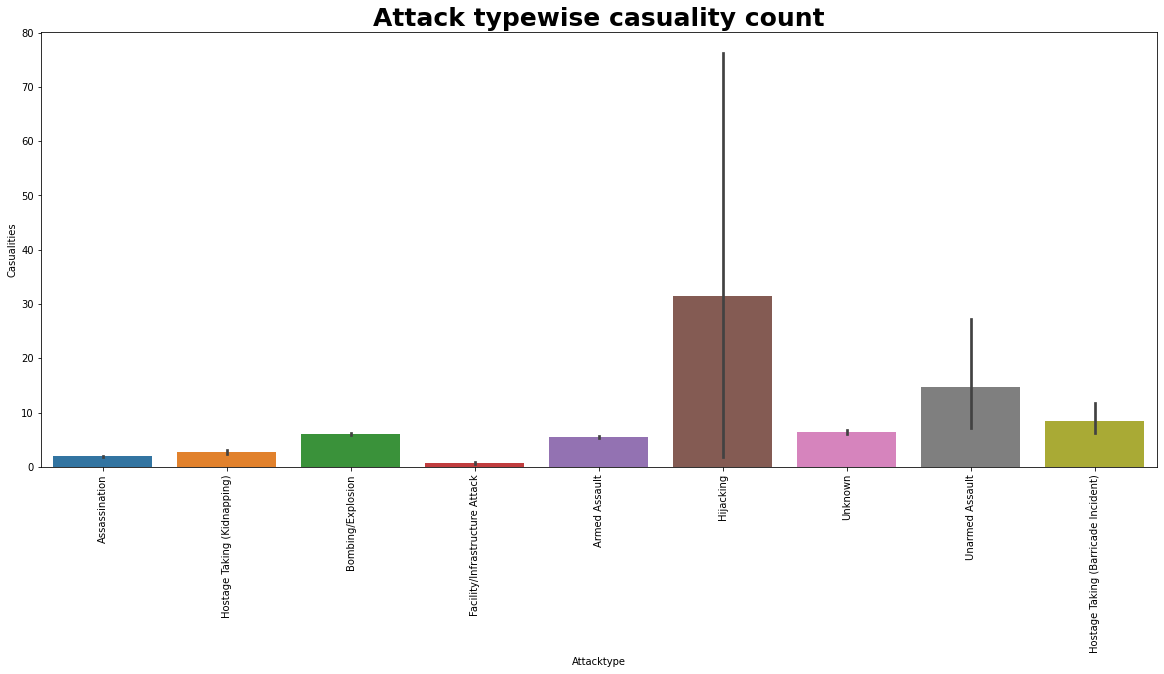

In [133]:
#Casualities in each attack type 
plt.figure(figsize=(20,8))
sns.barplot(x="Attacktype",y='Casualities', data=df)
plt.xticks(rotation=90)
plt.title("Attack typewise casuality count", size=25, fontweight="bold")

Text(0.5, 1.0, 'Terrorist groupwise Attack count')

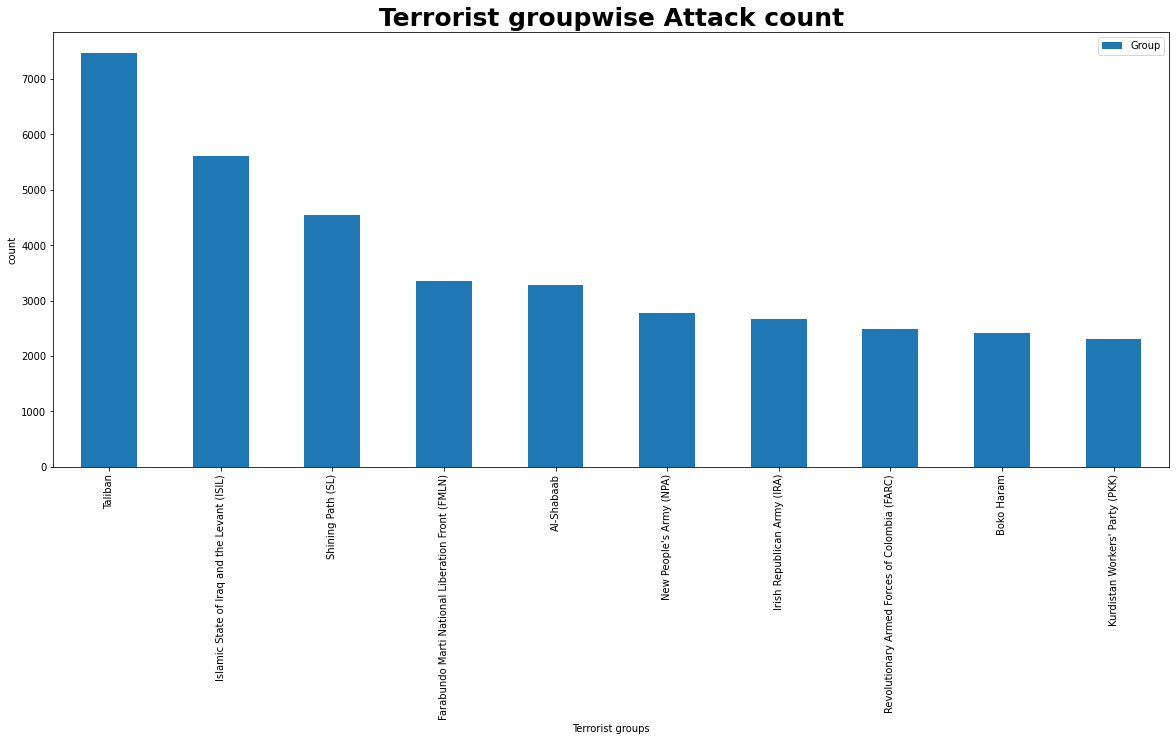

In [134]:
#number of attacks by each group of terrorists
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,8))
plt.ylabel('count')
plt.xlabel('Terrorist groups')
plt.title("Terrorist groupwise Attack count", size=25, fontweight="bold")

Text(0.5, 1.0, 'Terrorist groupwise Casuality count')

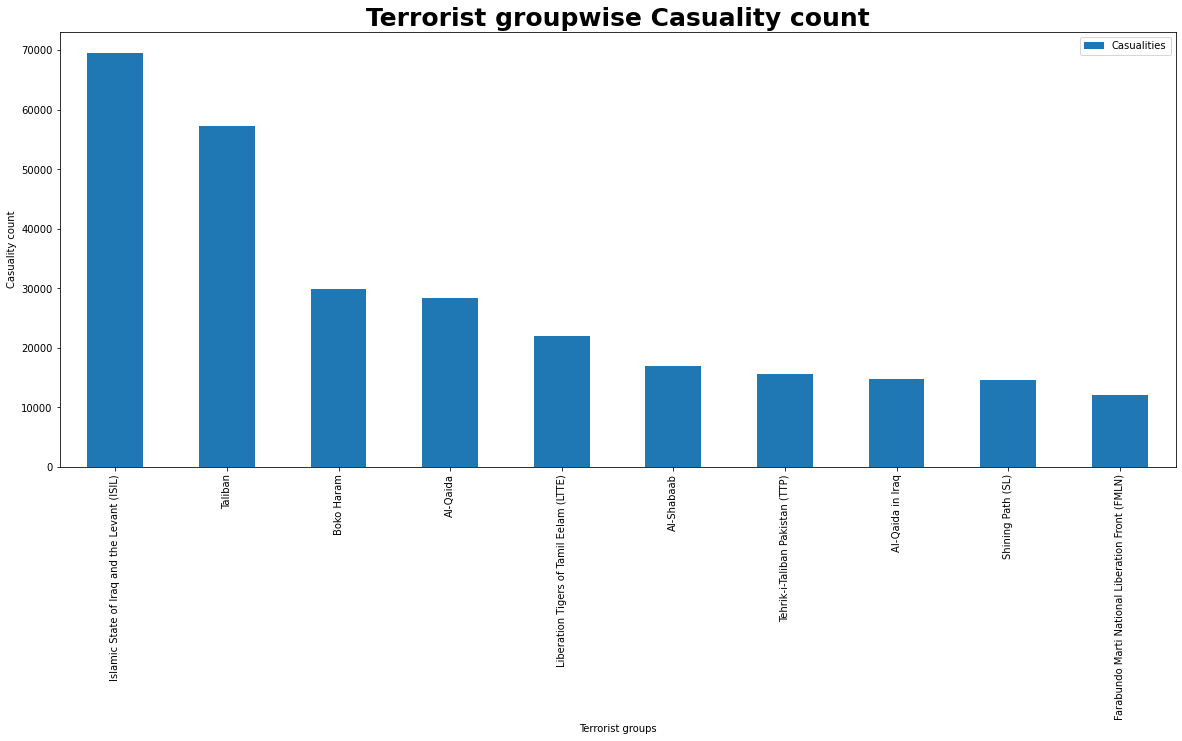

In [135]:
#Casualities caused by each terrorist group 
df[['Group','Casualities']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Casualities',ascending=False).head(10).plot(kind='bar',figsize=(20,8))
plt.ylabel('Casuality count')
plt.xlabel('Terrorist groups')
plt.title("Terrorist groupwise Casuality count", size=25, fontweight="bold")

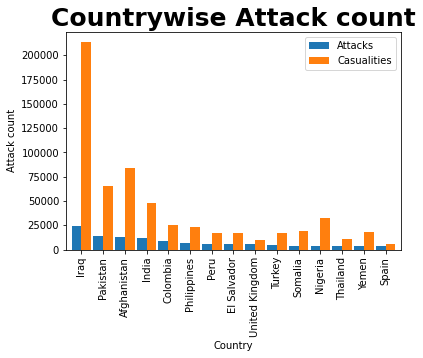

In [136]:
#number of attacks and casualties in each country
count=df['Country'].value_counts()[:15].to_frame()
count.columns=['Attacks']
data=df.groupby('Country')['Casualities'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
plt.ylabel('Attack count')
plt.xlabel('Country')
plt.title("Countrywise Attack count", size=25, fontweight="bold")
plt.show()

Text(0.5, 1.0, 'Targetwise Attack count')

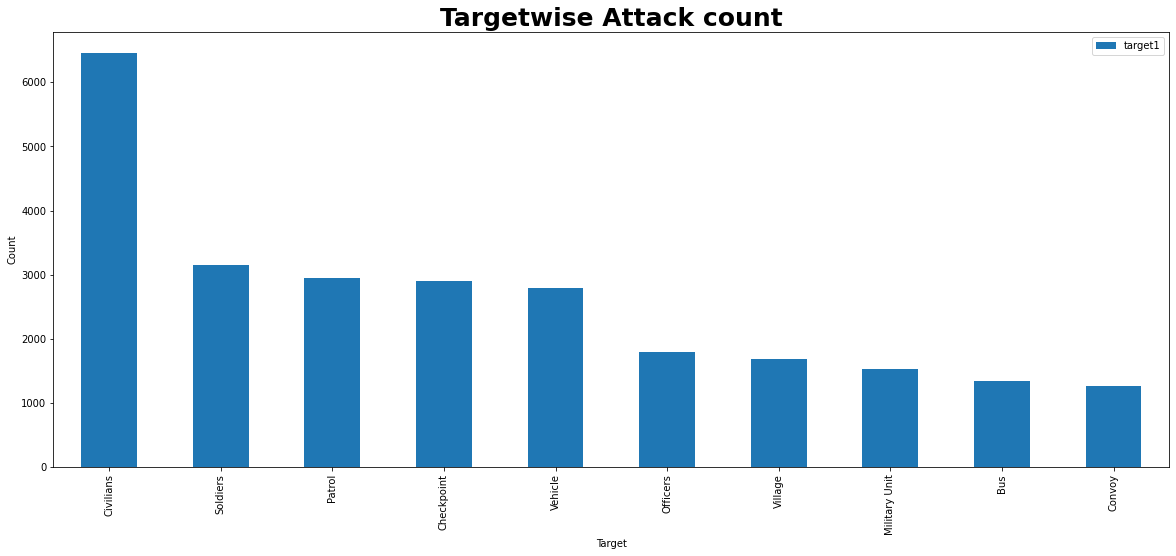

In [139]:
#target of each terrorist attack
df['target1'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,8))
plt.xlabel('Target')
plt.ylabel('Count')
plt.title("Targetwise Attack count", size=25, fontweight="bold")

Text(0.5, 1.0, 'Target typewise Attack count')

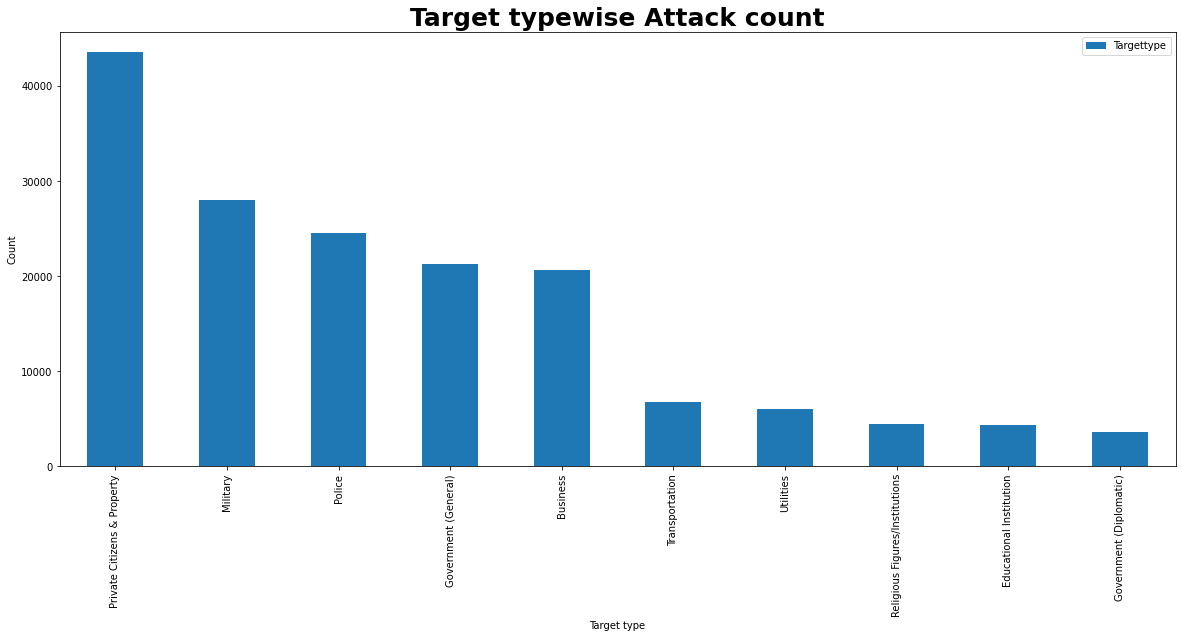

In [140]:
#targettype of each terrorist attack
df['Targettype'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,8))
plt.xlabel('Target type')
plt.ylabel('Count')
plt.title("Target typewise Attack count", size=25, fontweight="bold")

## **Insights**

In [94]:
print('Country with most attacks: ',df['Country'].value_counts().idxmax())
print('City with most attacks: ',df['City'].value_counts().index[1])
print("Region with the most attacks:",df['Region'].value_counts().idxmax())
print("Year with the most attacks:",df['Year'].value_counts().idxmax())
print("Month with the most attacks:",df['Month'].value_counts().idxmax())
print("Group with the most attacks:",df['Group'].value_counts().index[1])
print("Most Attack Types:",df['Attacktype'].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


*   Terrorist attacks were at a larger count during the period 2012-2017. It was at a peak during 2014 and the successive years shows gradual decrease in count though still high.

*   Middle East & North Africa are hot zones of terrorism along with South Asia
*   Among other countries in this zone Iraq is most affected.


*   Among the known cities Baghdad is the most affected.


*   Bombing/Explosion is the most common type of attack used by terrorists.

*   The Casuality count is highest when attck type is Hijacking
*   Taliban is the terrorist group with highest number of attacks while ISIL is the one which has caused highest casualities.


*   Terrorists attacks are mostly concentrated on Civilians and properties



